### **Here I have done exploratory data analysis on Haberman Cancer Survival Dataset from kaggle followed by a 3 layer FNN. The problem essentially is binary classification problem.**

Reading the data

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('/content/drive/MyDrive/Datasets/haberman.csv',)
data.columns=['Age','Year of operation','Axil_nodes','Survival_rate']
data.iloc[:,-1]-=1
data

,Age,Year of operation,Axil_nodes,Survival_rate
0,30,62,3,0
1,30,65,0,0
2,31,59,2,0
3,31,65,4,0
4,33,58,10,0
...,...,...,...,...
300,75,62,1,0
301,76,67,0,0
302,77,65,3,0
303,78,65,1,1


Features

In [54]:
data.columns

Index(['Age', 'Year of operation', 'Axil_nodes', 'Survival_rate'], dtype='object')

In [55]:
data.describe()

,Age,Year of operation,Axil_nodes,Survival_rate
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,0.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,0.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


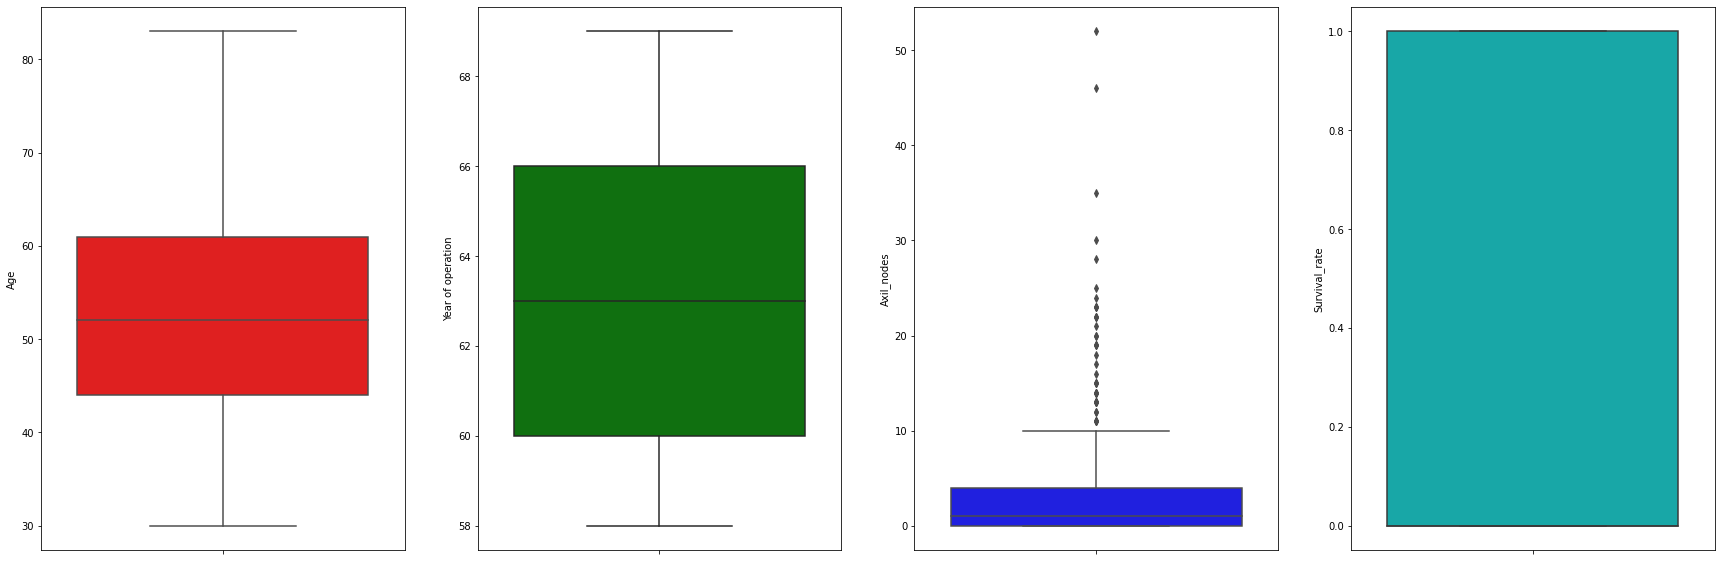

In [56]:
plt.figure(1,(30,10))
for i in range(4):
  plt.subplot(141+i)
  sns.boxplot(y=data.columns[i],data=data,color=['r','g','b','c'][i])

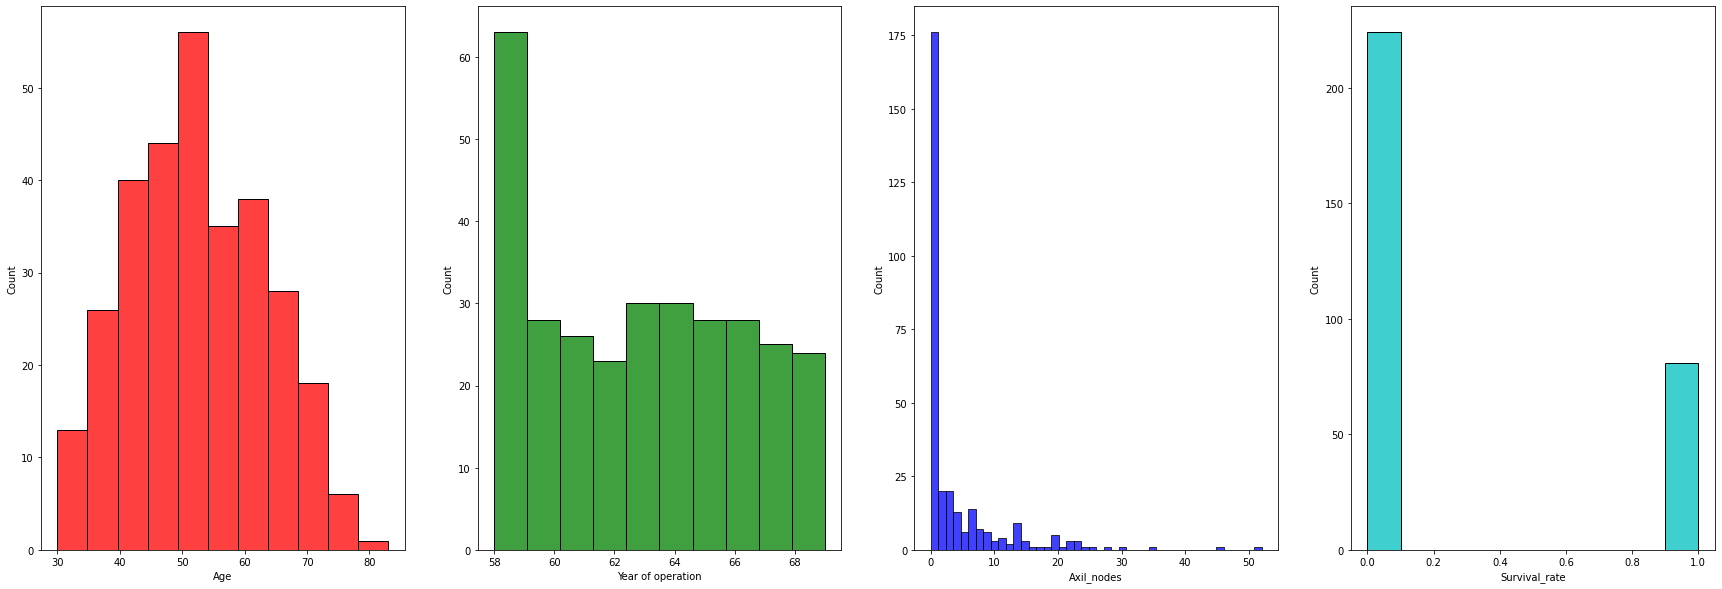

In [57]:
plt.figure(1,(30,10))
for i in range(4):
  plt.subplot(141+i)
  sns.histplot(data=data,x=data.columns[i],color=['r','g','b','c'][i])

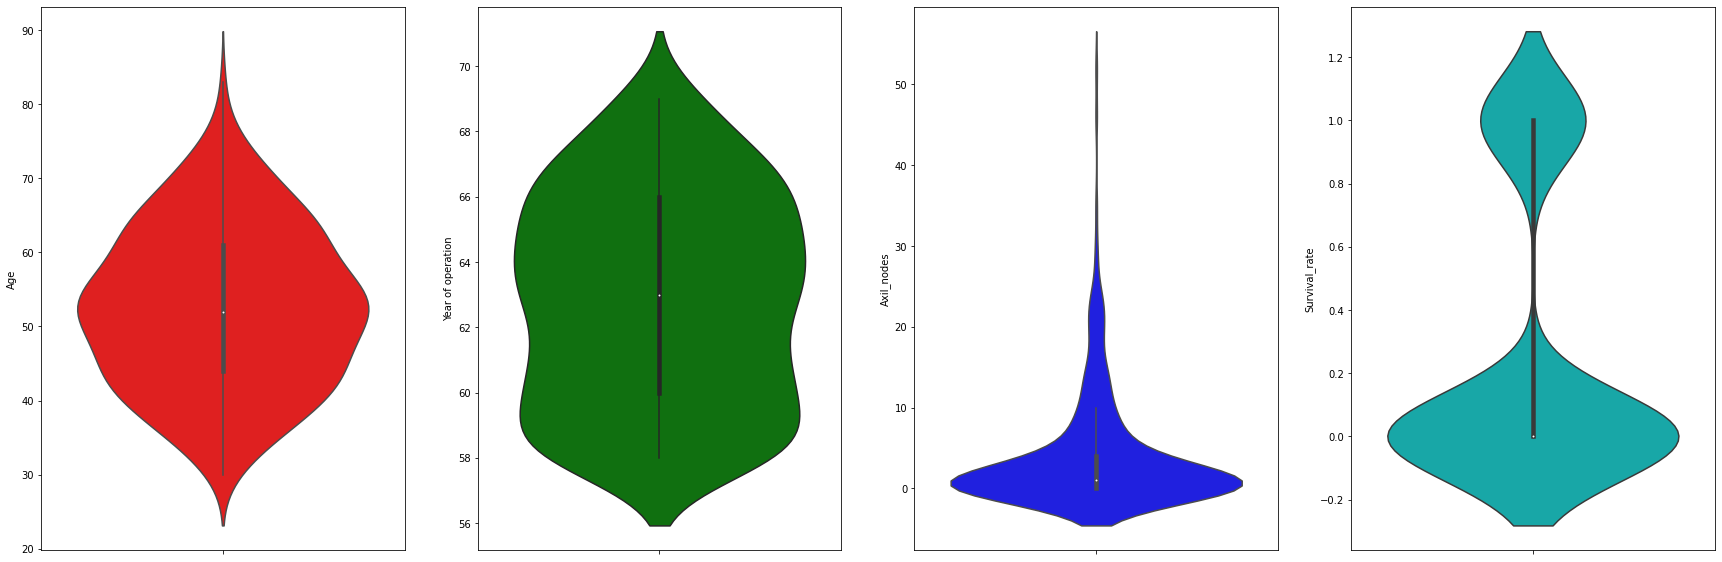

In [58]:
plt.figure(1,(30,10))
for i in range(4):
  plt.subplot(141+i)
  sns.violinplot(data=data,y=data.columns[i],color=['r','g','b','c'][i])

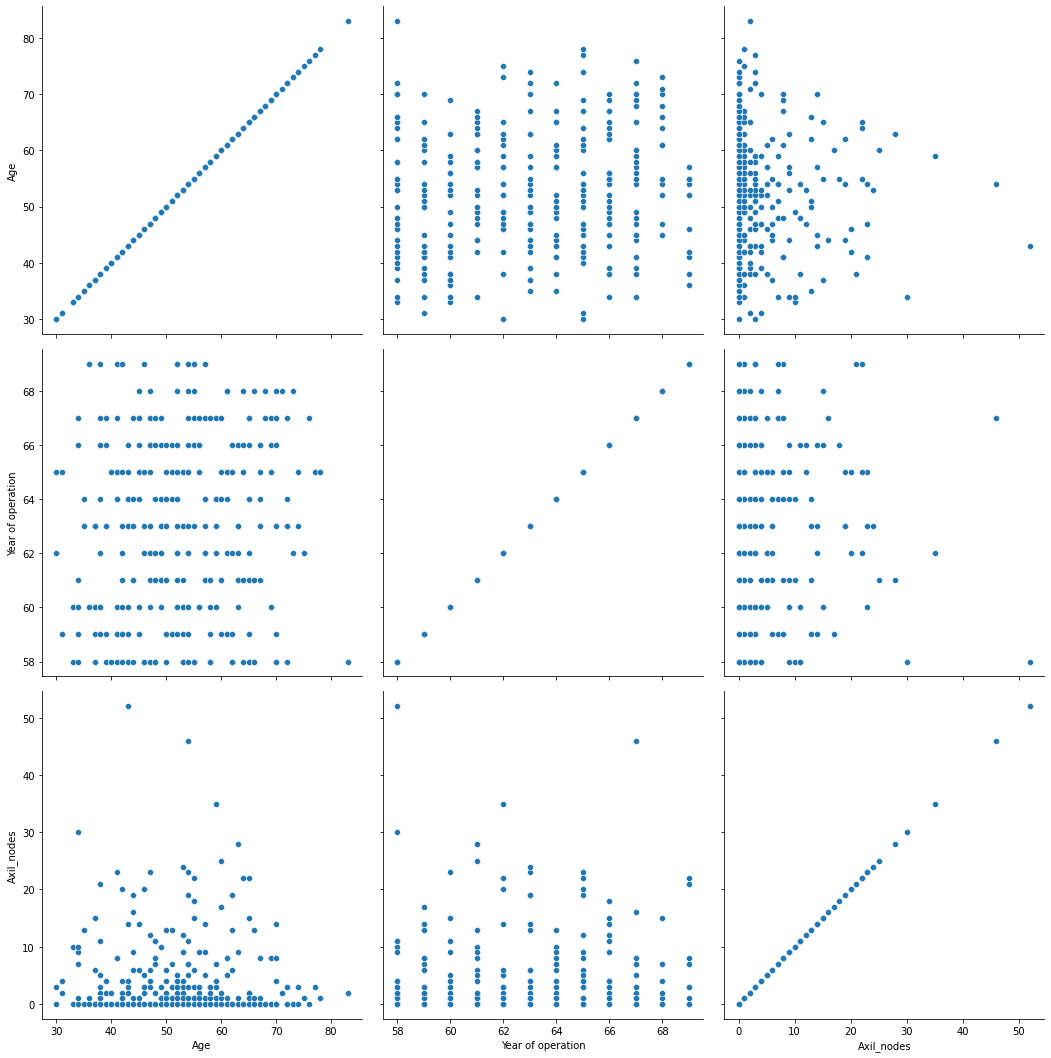

In [59]:
g=sns.PairGrid(data.iloc[:,:-1],height=5)
g.map(sns.scatterplot)

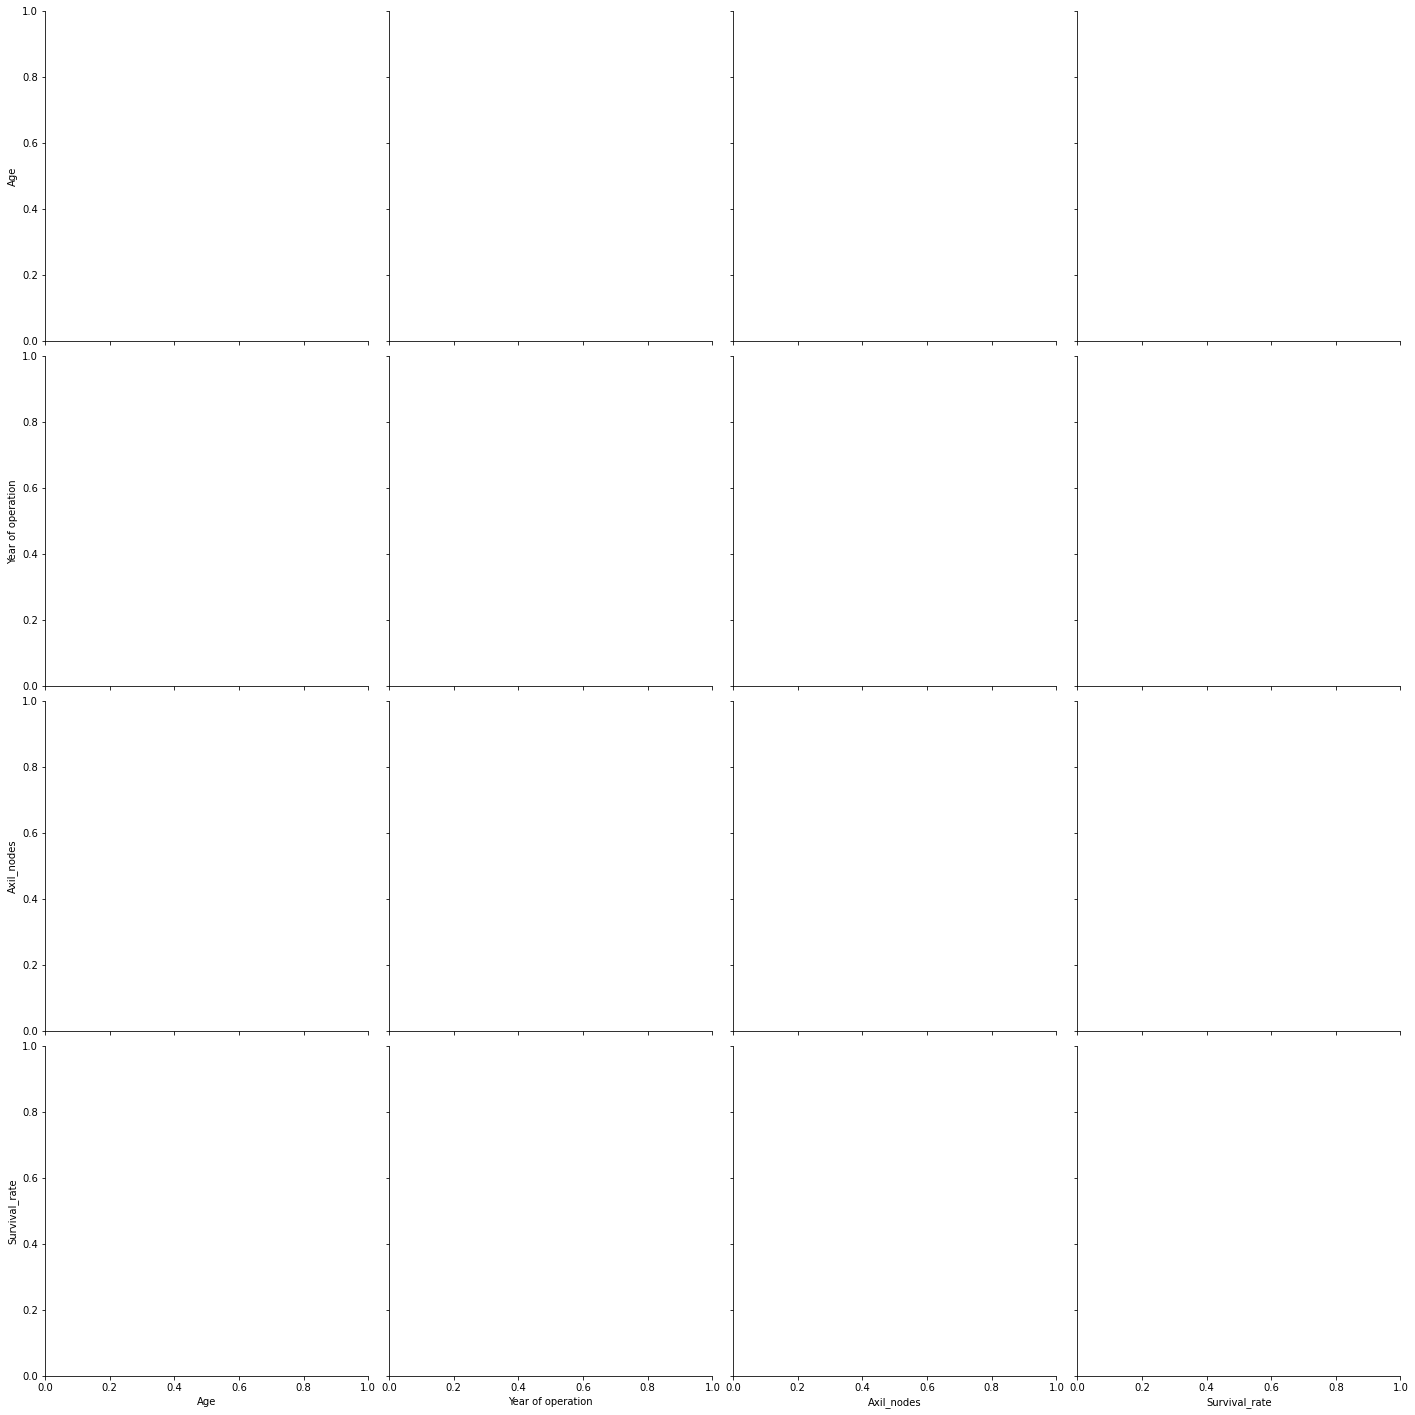

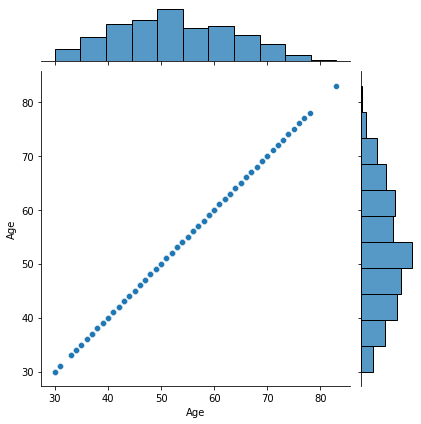

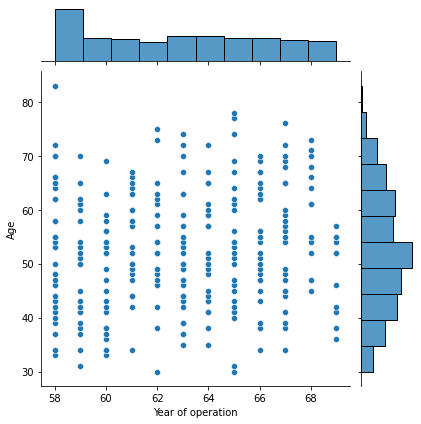

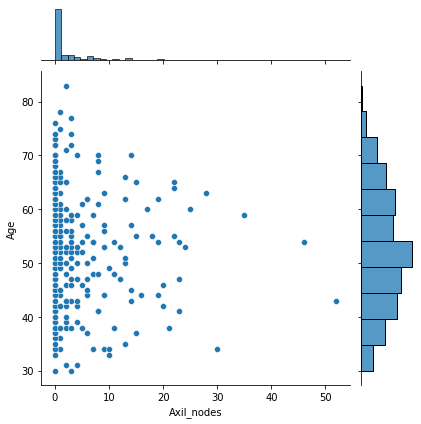

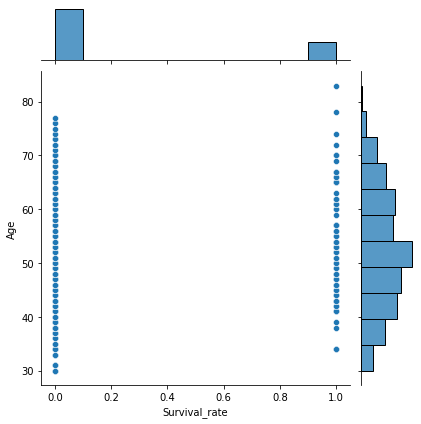

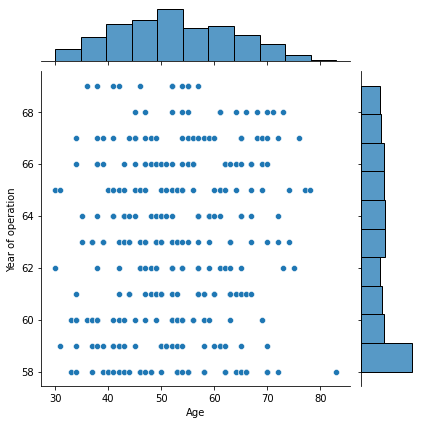

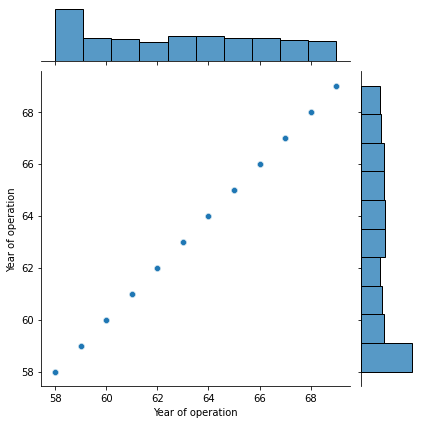

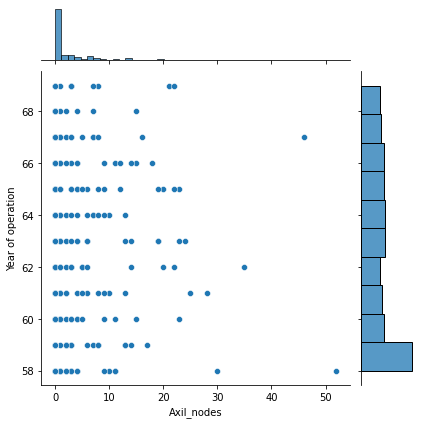

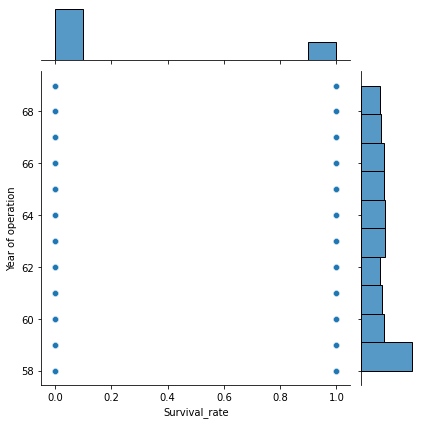

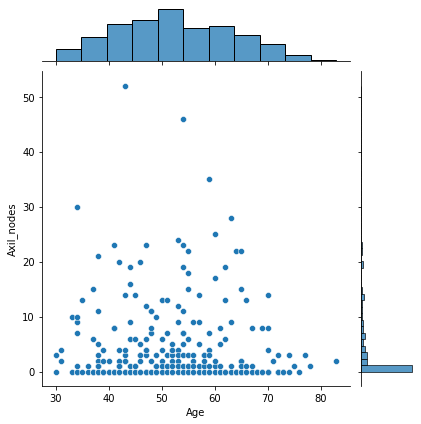

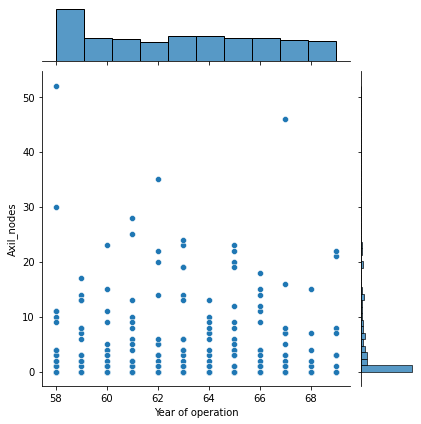

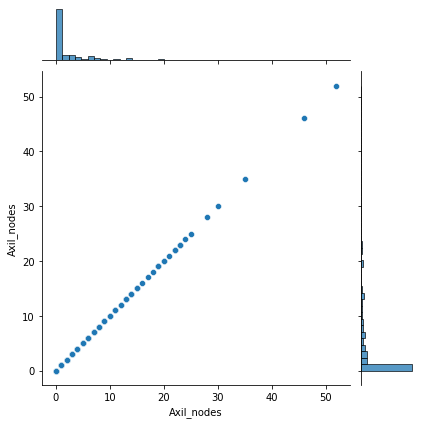

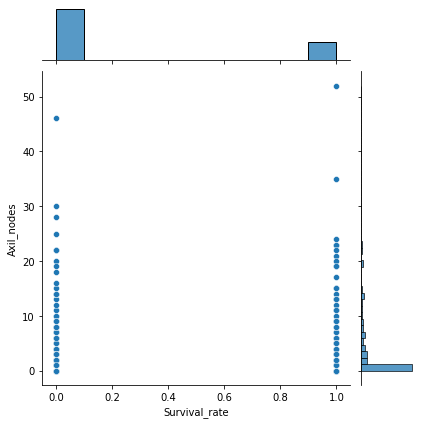

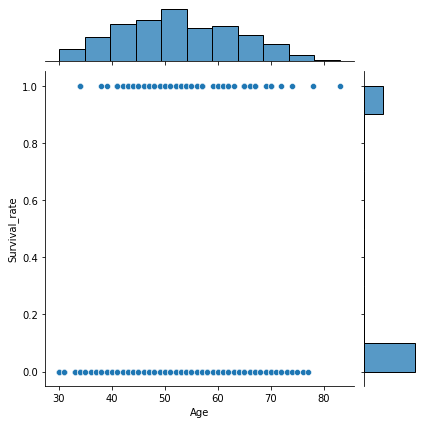

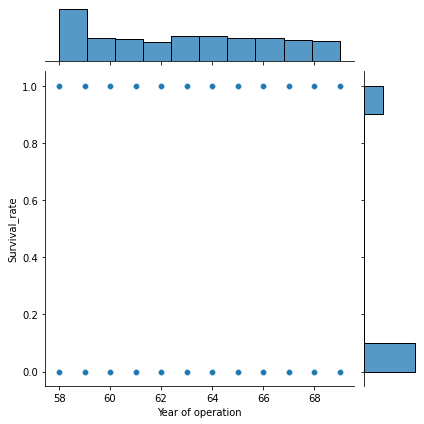

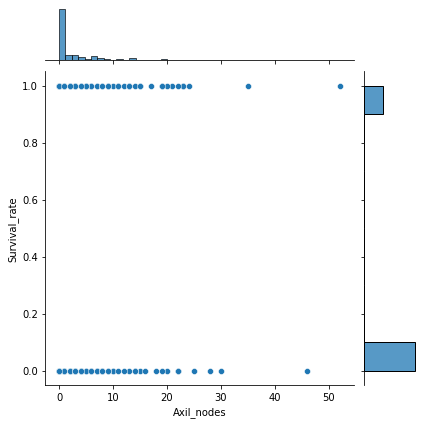

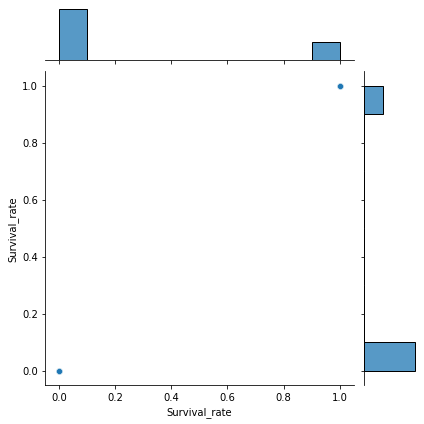

In [60]:
g=sns.PairGrid(data,height=5)
g.map(sns.jointplot)

In [130]:
from tensorflow.keras.layers import Dense,Input,Normalization
from tensorflow.keras import Model
def model(x,y,epochs):
  input=Input((3,))
  t=Dense(3,activation='sigmoid')(input)
  t=Dense(8,activation='sigmoid')(t)
  output=Dense(1,activation='sigmoid')(input)
  model=Model(input,output)
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  model.summary()
  history=model.fit(x=x,y=y,validation_split=0.2,epochs=epochs,verbose=1)
  return model,history

In [131]:
data=data.sample(frac=1)
normalalizer=Normalization(axis=-1)
normalalizer.adapt(data.iloc[:,:-1])
x=normalalizer(data.iloc[:,:-1])
x_train,y_train,x_test,y_test=x[:int(0.8*x.shape[0]),:],data.iloc[:int(0.8*x.shape[0]),-1],x[int(0.8*x.shape[0]):,:],data.iloc[int(0.8*x.shape[0]):,-1]
model,history=model(x_train,y_train,500)

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 3)]               0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
7/7 [==============================] - 1s 24ms/step - loss: 0.6750 - accuracy: 0.5949 - val_loss: 0.6823 - val_accuracy: 0.6122
Epoch 2/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6728 - accuracy: 0.5949 - val_loss: 0.6801 - val_accuracy: 0.6122
Epoch 3/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6708 - accuracy: 0.6000 - val_loss: 0.6781 - val_accuracy: 0.6122
Epoch 4/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6688 - accuracy: 0.6000 - val_loss:

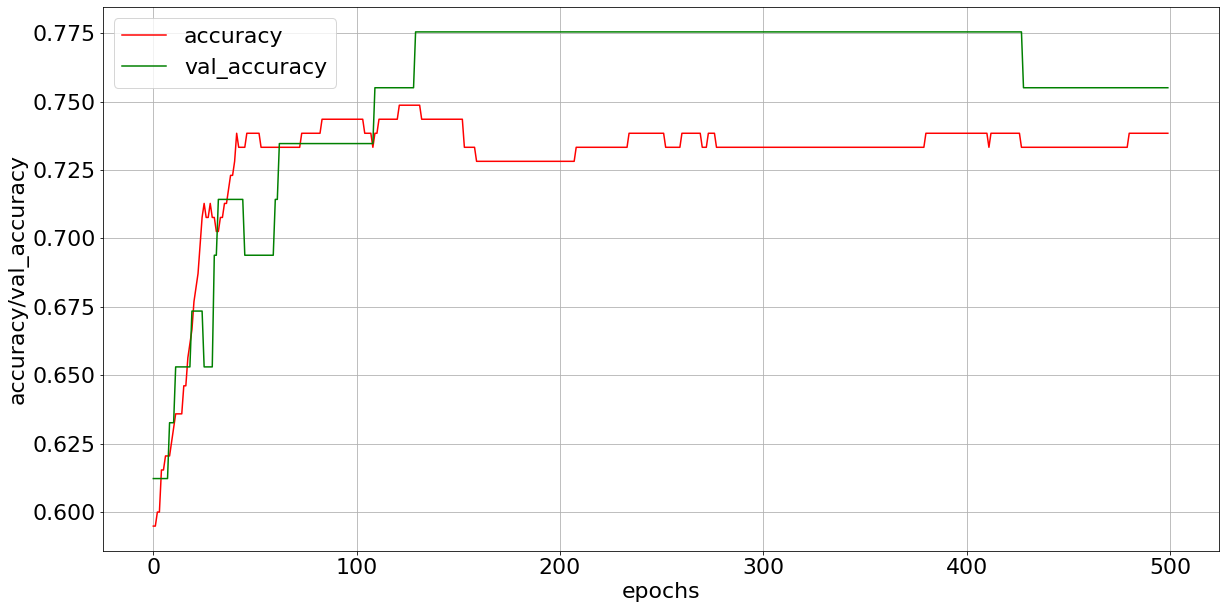

In [149]:
plt.figure(1,(20,10))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='g')
plt.grid()
plt.rcParams.update({'font.size':22})
plt.xlabel('epochs',)
plt.ylabel('accuracy/val_accuracy')
plt.legend(['accuracy','val_accuracy'])
plt.show()

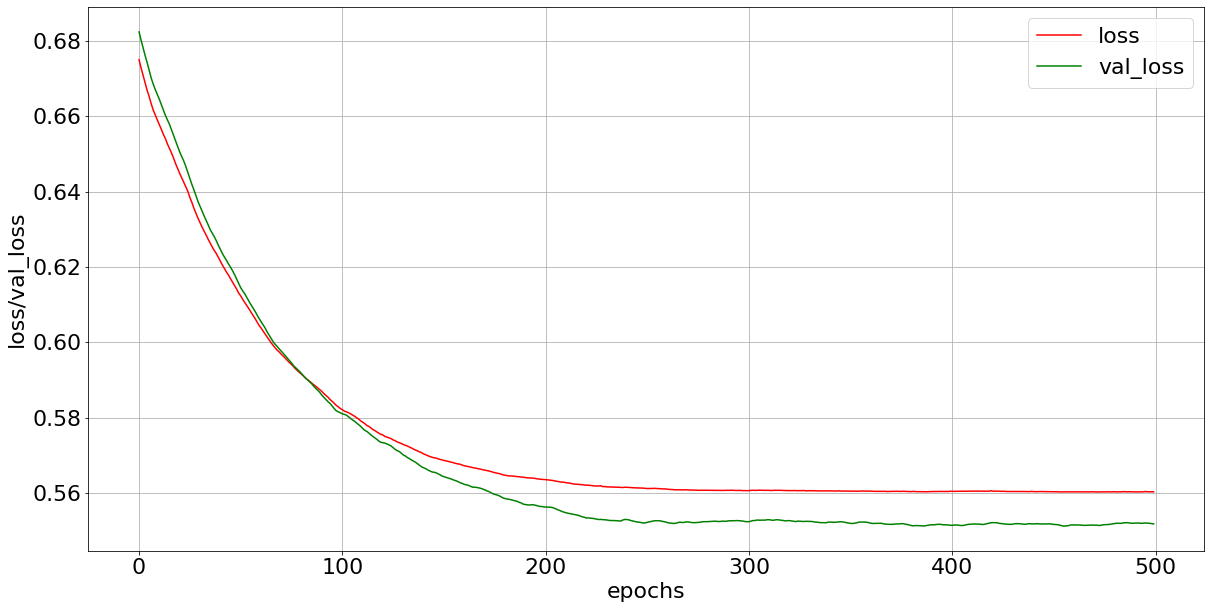

In [150]:
plt.figure(1,(20,10))
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.grid()
plt.rcParams.update({'font.size':22})
plt.xlabel('epochs',)
plt.ylabel('loss/val_loss')
plt.legend(['loss','val_loss'])
plt.show()

In [132]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.4675 - accuracy: 0.8033


[0.4675292372703552, 0.8032786846160889]